In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/wineQuality(cleaned).csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
X = df.drop(columns=['quality'])
y = df['quality']

In [4]:
y.value_counts()

3    2836
4    2836
5    2836
6    2836
7    2836
8    2836
9    2836
Name: quality, dtype: int64

In [5]:
cd ..

/home/hrach2003/Projects/HTI_ML/WineQuality/WineQualityML/src


In [6]:
from utils import classify
from utils.grid_random_search import gridSearch, randomizedSearch

# Optimizing RandomForestClassifier Params

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
classify(rf, X, y)

Accuracy: 88.51674641148325
CV Score: 82.14293679554604
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       580
           4       0.96      0.91      0.94       599
           5       0.77      0.79      0.78       556
           6       0.64      0.74      0.69       503
           7       0.86      0.81      0.84       594
           8       0.97      0.95      0.96       612
           9       1.00      1.00      1.00       527

    accuracy                           0.89      3971
   macro avg       0.89      0.88      0.88      3971
weighted avg       0.89      0.89      0.89      3971



(88.51674641148325, 82.14293679554604, array([6, 4, 5, ..., 8, 7, 3]))

In [7]:
random_grid = {
    'bootstrap': [True, False],
    'max_depth': [None, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600]
}

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
rand_search_results = randomizedSearch(rf, x_train, y_train, random_grid)
rand_search_results
#  result
# {'n_estimators': 600,
#  'min_samples_split': 2,
#  'min_samples_leaf': 2,
#  'max_features': 'sqrt',
#  'max_depth': None,
#  'bootstrap': False}

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  28.4s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  27.0s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  30.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  10.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  10.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  10.9s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; 

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=  18.5s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=  19.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=  18.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  31.2s
[CV] END bootstrap=False, 

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  12.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  12.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  12.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END bootstrap=False, max_depth=10

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [18]:
rf_result = pd.DataFrame(index=['accuracy', 'cv score'])
for n in [80, 100, 400, 600, 800]:
    params = {**rand_search_results, "n_estimators":n}
    rf = RandomForestClassifier(**params, random_state=42)
    rf_result[n] = classify(rf, X, y)

Accuracy: 89.52404935784438
CV Score: 82.60133068017687
              precision    recall  f1-score   support

           3       1.00      0.99      0.99       582
           4       0.98      0.93      0.95       600
           5       0.75      0.79      0.77       537
           6       0.64      0.75      0.69       492
           7       0.92      0.82      0.87       627
           8       0.98      0.97      0.98       608
           9       1.00      1.00      1.00       525

    accuracy                           0.90      3971
   macro avg       0.90      0.89      0.89      3971
weighted avg       0.90      0.90      0.90      3971

Accuracy: 89.59959707882146
CV Score: 82.78266550881803
              precision    recall  f1-score   support

           3       1.00      0.99      0.99       582
           4       0.98      0.93      0.96       602
           5       0.75      0.79      0.77       539
           6       0.64      0.75      0.69       495
           7       0

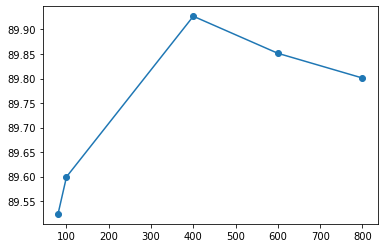

In [54]:
# rf_result = rf_result.T
# rf_result['n_tree'] = rf_result.index
plt.plot(rf_result['n_tree'], rf_result['accuracy'], marker='o')

In [9]:
best_params_rf = {
 **rand_search_results,
 'n_estimators': 400,
}
best_params_rf

NameError: name 'rand_search_results' is not defined

In [12]:
grid_param = {
    'n_estimators': [350,400,450],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['sqrt', 'log2', 'auto'],
    'max_depth': [None],
    'bootstrap': [False]
}

grid_search_results = gridSearch(rf, x_train, y_train, grid_param)
grid_search_results

RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=450)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
rf_final = RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=450)

accuracy, cv_score, y_pred = classify(rf_final, X, y)
print(confusion_matrix(y_pred, y_test))

Accuracy: 88.81893729539159
CV Score: 83.04460360282071
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       577
           4       0.97      0.91      0.94       602
           5       0.77      0.80      0.78       550
           6       0.66      0.73      0.69       516
           7       0.86      0.82      0.84       587
           8       0.98      0.95      0.97       612
           9       1.00      1.00      1.00       527

    accuracy                           0.89      3971
   macro avg       0.89      0.89      0.89      3971
weighted avg       0.89      0.89      0.89      3971

[[572   1   2   2   0   0   0]
 [  4 550  32  12   4   0   0]
 [  0   7 438  95  10   0   0]
 [  0  10  77 377  48   4   0]
 [  0   0  19  78 481   8   1]
 [  0   0   1  10  17 584   0]
 [  0   0   0   0   1   1 525]]


## Increasing the accuracy of RandomForest from 88.5 to 89.5

<AxesSubplot:>

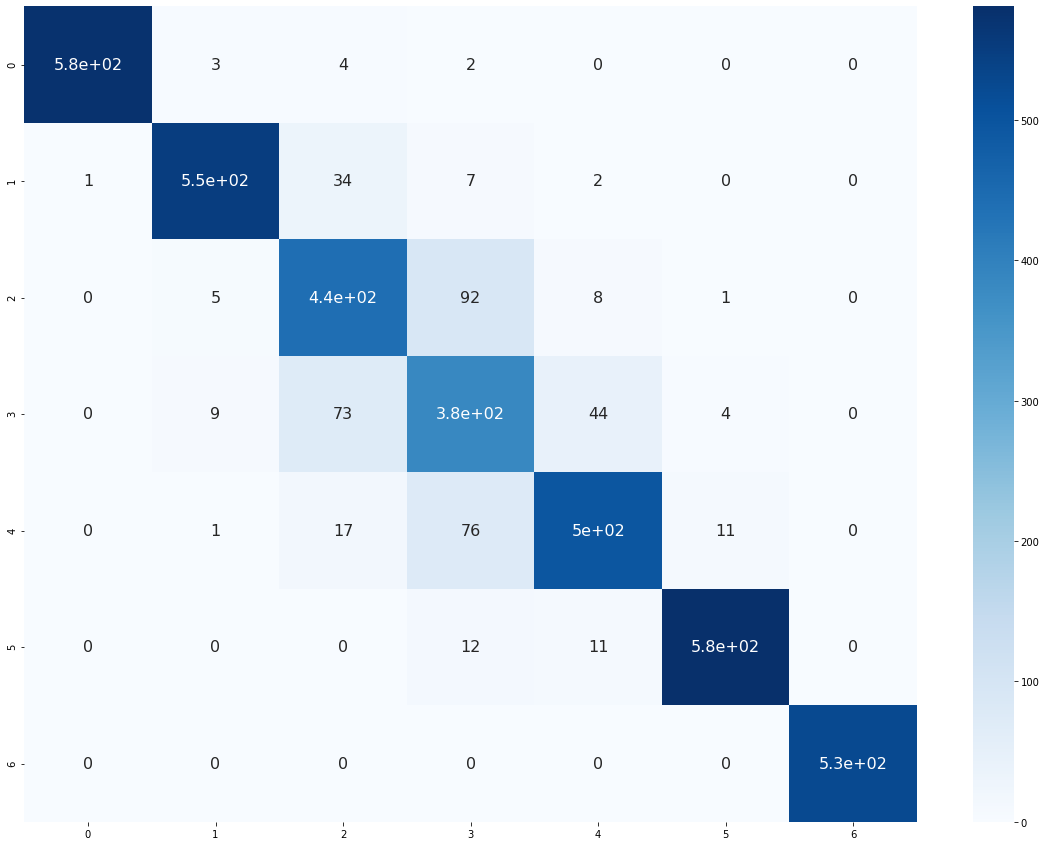

In [12]:
plt.figure(figsize = (20,15))
sns.heatmap(confusion_matrix(y_pred, y_test), cmap="Blues", annot=True,annot_kws={"size": 16})

# Optimizing ExtraTreeClassifier Params

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
accuracy, cv_mean, y_pred = classify(et, X, y)

Accuracy: 89.24704104759506
CV Score: 83.35186271754857
              precision    recall  f1-score   support

           3       1.00      0.99      1.00       579
           4       0.98      0.93      0.96       599
           5       0.76      0.80      0.78       547
           6       0.65      0.73      0.69       511
           7       0.88      0.83      0.85       594
           8       0.98      0.95      0.96       614
           9       1.00      1.00      1.00       527

    accuracy                           0.89      3971
   macro avg       0.89      0.89      0.89      3971
weighted avg       0.90      0.89      0.89      3971



In [11]:
random_grid = {
    'bootstrap': [True, False],
    'max_depth': [None, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2', *range(50,401,50)],
    'min_samples_leaf': [2, 5, 10, 25],
    'min_samples_split': [2, 5, 10, 25],
    'n_estimators': [100, 200, 400, 600]
}
random_grid

{'bootstrap': [True, False],
 'max_depth': [None, 5, 10, 15],
 'max_features': ['auto',
  'sqrt',
  'log2',
  50,
  100,
  150,
  200,
  250,
  300,
  350,
  400],
 'min_samples_leaf': [2, 5, 10, 25],
 'min_samples_split': [2, 5, 10, 25],
 'n_estimators': [100, 200, 400, 600]}

In [12]:
rand_search_results = randomizedSearch(et, x_train, y_train, random_grid, n_iter=2000)
rand_search_results

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
[CV] END bootstrap=False, max_depth=5, max_features=50, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=50, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=50, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=100, min_samples_leaf=25, min_samples_split=10, n_estimators=200; tota

[CV] END bootstrap=False, max_depth=None, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=250, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=250, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=250, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_dep

[CV] END bootstrap=True, max_depth=5, max_features=150, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=150, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=150, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=150, min_samples_leaf=25, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_featu

[CV] END bootstrap=False, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_de

[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=5, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=25, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=25, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=25, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, ma

[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=350, min_samples_leaf=25, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=350, min_samples_leaf=25, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, ma

[CV] END bootstrap=True, max_depth=10, max_features=150, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   2.2s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=25, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max

[CV] END bootstrap=False, max_depth=10, max_features=150, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=25, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=25, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=25, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, ma

[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_features=400, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=400, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=400, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_

[CV] END bootstrap=True, max_depth=15, max_features=100, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.8s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.8s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, max_features=150, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=150, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=150, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, m

[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.6s
[CV] END bootstrap=True, max_depth=5, max_fe

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_features=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=False, max_depth=15, max_features=200, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=300, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=300, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=300, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=None

[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=25, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10

[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=5, max_features=150, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_featu

[CV] END bootstrap=True, max_depth=10, max_features=50, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=50, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=50, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=50, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=5, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=50, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=50, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=50, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=5, max_f

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=25, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=25, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=25, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=1

[CV] END bootstrap=True, max_depth=15, max_features=200, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=200, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=200, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.7s
[CV] END bootstrap=False, max_depth=15, max

[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=25, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=25, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=25, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_dep

[CV] END bootstrap=False, max_depth=15, max_features=250, min_samples_leaf=5, min_samples_split=25, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=350, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=350, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=350, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   1.9s
[CV] END bootstrap=True, max_depth=15, max_featu

[CV] END bootstrap=True, max_depth=10, max_features=150, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=350, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=350, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=350, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max

[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END bootstrap=True, max_depth=5, max_features=300, min_samples_leaf=5, min_samples_split=25, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=False, max_depth=5, max_features=350, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=None

[CV] END bootstrap=True, max_depth=10, max_features=50, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=50, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=50, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=50, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=50, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=50, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_f

[CV] END bootstrap=False, max_depth=15, max_features=100, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=100, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=100, min_samples_leaf=25, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=5, max_features=100, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=5

[CV] END bootstrap=False, max_depth=15, max_features=350, min_samples_leaf=5, min_samples_split=25, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=350, min_samples_leaf=5, min_samples_split=25, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=250, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=250, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=250, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=1

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=N

[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   2.9s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   2.6s
[CV] END bootstrap=False, max_depth=5, max_features=300, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=300, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=300, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=10, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=10, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=10,

[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=350, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=350, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=350, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=300, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=True, max_depth=10, max_features=300, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=300, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=5, min_samples_split=25, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=5, min_samples_split=25, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=5, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_fea

[CV] END bootstrap=False, max_depth=None, max_features=150, min_samples_leaf=10, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   4.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   4.7s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=15,

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   3.0s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=300, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=300, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=300, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=No

[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=25, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=25, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=25, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=400, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=400, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=400, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_featur

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   3.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   3.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, max_features=250, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=250, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=250, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   2.3s
[CV] END bootstrap=True, max_depth=5, ma

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=5, max_features=150, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=150, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=150, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=400, min_samples_leaf=25, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_features

[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=250, min_samples_leaf=10, min_samples_split=25, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=250, min_samples_leaf=10, min_samples_split=25, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=250, min_samples_leaf=10, min_samples_split=25, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END bootstrap=False, max_depth=15, max_features=350, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, m

[CV] END bootstrap=True, max_depth=10, max_features=100, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=100, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=100, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=50, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=50, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=50, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=350, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=No

[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=50, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=50, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=50, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=150,

[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   2.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   2.7s
[CV] END bootstrap=True, max_depth=None, 

[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=100, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=100, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_

[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=50, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=50, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features

[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, ma

[CV] END bootstrap=False, max_depth=None, max_features=350, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=350, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=200, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=200, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=200, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=350, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=350, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=350, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, 

[CV] END bootstrap=True, max_depth=5, max_features=400, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=25, min_samples_split=25, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=25, min_samples_split=25, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=25, min_samples_split=25, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   5.3s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=2, min_samples_split=25, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.4s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.4s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=10,

[CV] END bootstrap=False, max_depth=15, max_features=300, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=300, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=300, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=300, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_feat

[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   3.6s
[CV] END bootstrap=False, max_depth=15, max_f

[CV] END bootstrap=True, max_depth=15, max_features=200, min_samples_leaf=2, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=100, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=100, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=100, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_fe

[CV] END bootstrap=False, max_depth=10, max_features=300, min_samples_leaf=25, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_f

[CV] END bootstrap=False, max_depth=5, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   2.3s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=5, ma

[CV] END bootstrap=False, max_depth=10, max_features=250, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=250, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=250, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=250, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_fe

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   1.9s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   2.2s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   2.2s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=5, 

[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   4.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   4.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   4.3s
[CV] END bootstrap=False, max_depth=None, max_features=200, min_samples_leaf=25, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=200, min_samples_leaf=25, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=200, min_samples_leaf=25, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, m

[CV] END bootstrap=True, max_depth=5, max_features=250, min_samples_leaf=25, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=250, min_samples_leaf=25, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=350, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=No

[CV] END bootstrap=False, max_depth=15, max_features=50, min_samples_leaf=25, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=50, min_samples_leaf=25, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=50, min_samples_leaf=25, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=350, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=350, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=350, min_samples_leaf=25, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=400, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_feat

[CV] END bootstrap=False, max_depth=None, max_features=100, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=100, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=100, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   2.0s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   2.0s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   2.0s
[CV] END bootstrap=False, max_depth=10, max_features=200, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   3.3s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   3.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=25, min_samples_split=25, n_estimators=600; total time=   2.9s
[CV] END bootstrap=False, max_depth=5, max_features=250, min_samples_leaf=10, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, 

[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=25, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=250, min_samples_leaf=5, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=250, min_samples_leaf=5, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=250, min_samples_leaf=5, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=Non

[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, max_f

[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=25, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=25, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=25, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   2.6s
[CV] END bootstrap=False, max_d

[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=5, max_features=200, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=300, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=300, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=300, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_f

[CV] END bootstrap=False, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=250, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, m

[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.3s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.2s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=50, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_fe

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   4.9s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   4.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   5.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=100, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max

[CV] END bootstrap=False, max_depth=5, max_features=50, min_samples_leaf=25, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=50, min_samples_leaf=25, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=400, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=400, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=400, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=300, min_samples_leaf=25, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=N

[CV] END bootstrap=True, max_depth=None, max_features=250, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=250, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=350, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=350, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_featu

[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=150, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=100, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=100, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_fea

[CV] END bootstrap=False, max_depth=10, max_features=250, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=250, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=100, min_samples_leaf=25, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=350, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=350, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=150, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=200, min_samples_leaf=25, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=400, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_fea

[CV] END bootstrap=False, max_depth=None, max_features=250, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=250, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=5, min_samples_split=25, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=5, min_samples_split=25, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=5, min_samples_split=25, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   3.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   3.7s
[CV] END bootstrap=True, max_depth=None, 

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=400, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=400, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=400, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=600; total time=   3.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=600; total time=   3.0s
[CV] END bootstrap=True, max_depth=10, max

[CV] END bootstrap=False, max_depth=None, max_features=50, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=50, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=150, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=50, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=50, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, 

[CV] END bootstrap=True, max_depth=5, max_features=150, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, max_depth=None, max_features=350, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=350, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=350, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max

[CV] END bootstrap=False, max_depth=None, max_features=300, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   3.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   4.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=25, n_estimators=600; total time=   5.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END bootstrap

[CV] END bootstrap=False, max_depth=5, max_features=150, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, max_

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   3.8s
[CV] END bootstrap=False, max_depth=None, max_features=50, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=50, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=50, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=15, m

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=400, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=400, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=400, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=100, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, ma

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=25, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, max

[CV] END bootstrap=True, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=350, min_samples_leaf=5, min_samples_split=25, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_f

[CV] END bootstrap=True, max_depth=15, max_features=50, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   3.6s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   3.5s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   3.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_fea

[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=5, n_estimators=600; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=400, min_samples_leaf=2, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=100, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=100, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=100, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_fe

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   3.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   3.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   3.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   3.9s
[CV] END bootstrap=False, max_depth=10, max_features=150, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=10,

[CV] END bootstrap=False, max_depth=5, max_features=50, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=50, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=50, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=250, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_feature

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=25, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=25, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=150, min_samples_leaf=2, min_samples_split=25, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=150, min_samples_leaf=25, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, ma

[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=25, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=25, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=200, min_samples_leaf=25, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END bootstrap=False, max_depth=5,

[CV] END bootstrap=False, max_depth=15, max_features=250, min_samples_leaf=5, min_samples_split=25, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=250, min_samples_leaf=5, min_samples_split=25, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=400, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=400, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=400, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=100, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=100, min_samples_leaf=25, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, ma

[CV] END bootstrap=True, max_depth=None, max_features=250, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=400, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=400, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=400, min_samples_leaf=25, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   1.6s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=25, n_estimators=400; total time=   1.7s
[CV] END bootstrap=True, max_depth=5, max_fea

[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=350, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=350, min_samples_leaf=2, min_samples_split=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_featur

[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=200, min_samples_leaf=2, min_samples_split=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_features=50, min_samples_leaf=2, min_samples_split=25, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [13]:
classify(ExtraTreesClassifier(**rand_search_results), X, y)

Accuracy: 87.91236464366659
CV Score: 82.67689996809361
              precision    recall  f1-score   support

           3       1.00      0.99      1.00       579
           4       0.98      0.91      0.94       608
           5       0.76      0.80      0.78       541
           6       0.60      0.72      0.65       481
           7       0.85      0.78      0.81       611
           8       0.98      0.94      0.96       623
           9       1.00      1.00      1.00       528

    accuracy                           0.88      3971
   macro avg       0.88      0.88      0.88      3971
weighted avg       0.89      0.88      0.88      3971



(87.91236464366659, 82.67689996809361, array([6, 5, 5, ..., 8, 7, 3]))

In [16]:
grid_param = {
    'n_estimators': [350,400,450],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt', 'log2', 'auto'],
    'max_depth': [None],
    'bootstrap': [False]
}

grid_search_results = gridSearch(et, x_train, y_train, grid_param)
grid_search_results

ExtraTreesClassifier(min_samples_leaf=2, n_estimators=350)

In [23]:
classify(ExtraTreesClassifier(min_samples_leaf=2, n_estimators=350), X, y)

Accuracy: 88.13900780659783
CV Score: 82.62147800774761
              precision    recall  f1-score   support

           3       1.00      0.99      1.00       579
           4       0.98      0.91      0.94       610
           5       0.76      0.80      0.78       538
           6       0.62      0.72      0.66       495
           7       0.85      0.80      0.82       597
           8       0.98      0.93      0.95       625
           9       1.00      1.00      1.00       527

    accuracy                           0.88      3971
   macro avg       0.88      0.88      0.88      3971
weighted avg       0.89      0.88      0.88      3971



(88.13900780659783, 82.62147800774761, array([6, 5, 5, ..., 8, 8, 3]))

## We did not get any increase, so leaving the default one

<AxesSubplot:>

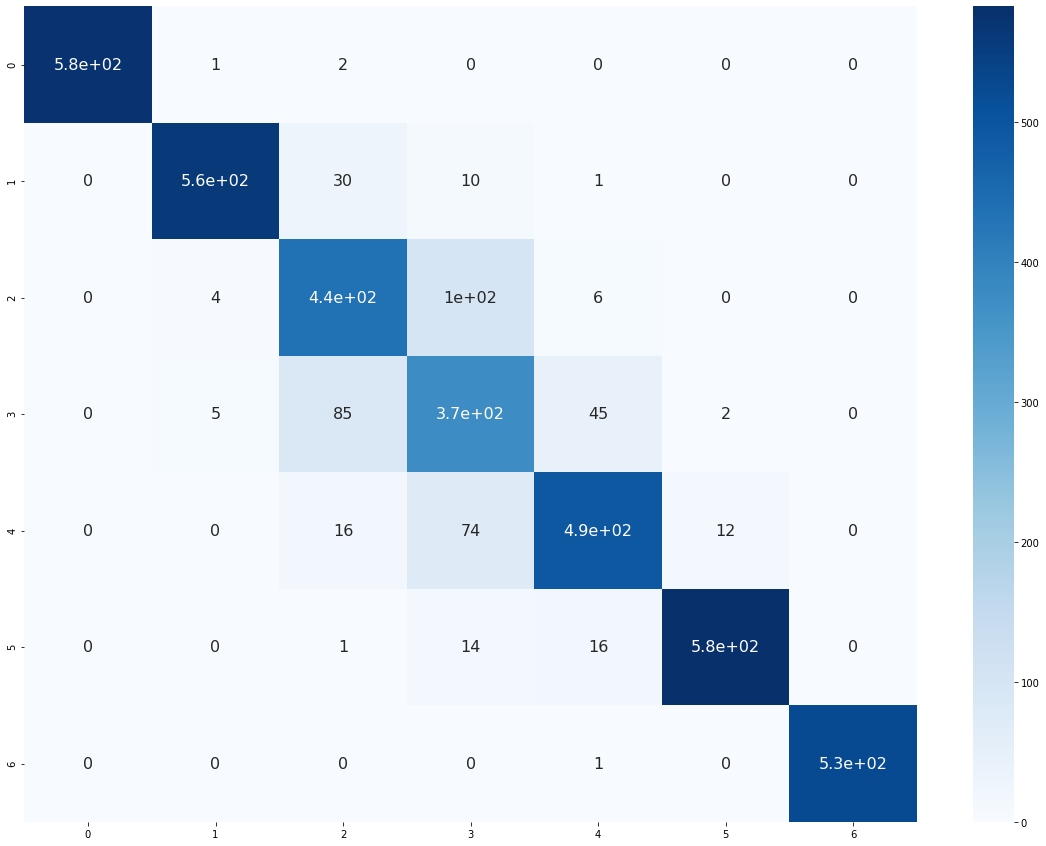

In [15]:
from sklearn.metrics import confusion_matrix 
plt.figure(figsize = (20,15))
sns.heatmap(confusion_matrix(y_pred, y_test), cmap="Blues", annot=True,annot_kws={"size": 16})